In [1]:
import pandas as pd    ###dataread###（1〜4行目と出力の上5行くらいを図示）
data  = pd.read_csv("sensor_data_200.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))
print(data)

           date    time   ir  lidar
0      20180122   95819  305    214
1      20180122   95822  299    211
2      20180122   95826  292    199
3      20180122   95829  321    208
4      20180122   95832  298    212
5      20180122   95835  327    212
6      20180122   95838  293    215
7      20180122   95840  309    218
8      20180122   95843  323    208
9      20180122   95846  292    217
10     20180122   95850  294    215
11     20180122   95852  323    218
12     20180122   95856  319    218
13     20180122   95858  313    214
14     20180122   95902  298    209
15     20180122   95905  296    211
16     20180122   95908  294    210
17     20180122   95911  314    215
18     20180122   95914  300    212
19     20180122   95917  324    219
20     20180122   95920  295    220
21     20180122   95922  320    214
22     20180122   95925  302    211
23     20180122   95928  303    215
24     20180122   95932  297    215
25     20180122   95934  306    210
26     20180122   95937  302

In [2]:
print(data["lidar"][0:5]) ###getvalues###

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


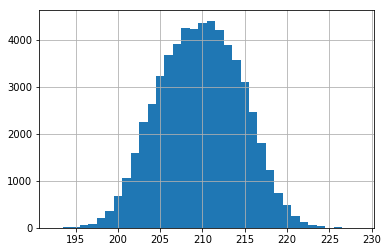

In [47]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

In [4]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)   ###calcmean###
mean2 = data["lidar"].mean()
print(mean1,mean2)

209.737132976 209.737132976


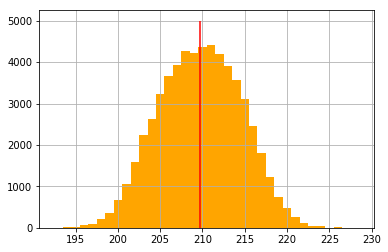

In [50]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),color="orange",align='left')   ###avgplot###
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [13]:
xs = data["lidar"].values
mean = sum(xs)/len(xs)
diff_square = [ (x - mean)**2 for x in xs]

sampling_var = sum(diff_square)/(len(xs))
unbiased_var = sum(diff_square)/(len(xs)-1)

pandas_var = data["lidar"].var()

print(unbiased_var)
print(sampling_var)
print(pandas_var)

23.4081065986
23.4077097703
23.4081065986


In [16]:
stddev = data["lidar"].std()

print(stddev)
print(stddev**2)

4.83819249292
23.4081065986


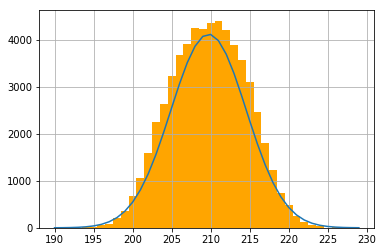

In [46]:
from scipy.stats import norm

xs = range(190,230)
ys = [norm.pdf(x, mean1, stddev)*50000 for x in xs]

data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),color="orange",align='left')  
plt.plot(xs,ys)
plt.show()